https://github.com/BUPT-PRIV/MAE-priv/blob/d79eb23d7c76250aa1b61ee1db8a1b6382c5dbc0/utils/native_scaler.py

In [3]:
import math
import numpy as np
def cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs=0,
                     start_warmup_value=0, warmup_steps=-1):
    warmup_schedule = np.array([])
    warmup_iters = warmup_epochs * niter_per_ep
    if warmup_steps > 0:
        warmup_iters = warmup_steps
    print("Set warmup steps = %d" % warmup_iters)
    if warmup_epochs > 0:
        warmup_schedule = np.linspace(start_warmup_value, base_value, warmup_iters)

    iters = np.arange(epochs * niter_per_ep - warmup_iters)
    schedule = np.array(
        [final_value + 0.5 * (base_value - final_value) * (1 + math.cos(math.pi * i / (len(iters)))) for i in iters])

    schedule = np.concatenate((warmup_schedule, schedule))

    assert len(schedule) == epochs * niter_per_ep
    return schedule

In [5]:
cosine_scheduler(1e-3, 1e-5, 300, 32, warmup_epochs=5)

Set warmup steps = 160


array([0.00000000e+00, 6.28930818e-06, 1.25786164e-05, ...,
       1.00002467e-05, 1.00001096e-05, 1.00000274e-05])

Set warmup steps = 32000


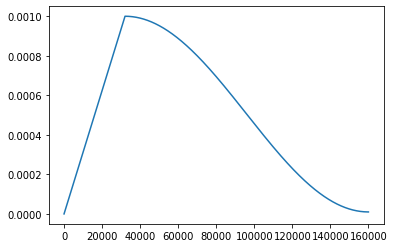

In [11]:
import matplotlib.pyplot as plt
plt.plot(cosine_scheduler(1e-3, 1e-5, 5000, 32, warmup_epochs=1000))

In [24]:
import torch
import timm
resnet = timm.create_model("resnet18", pretrained=False)
adam = torch.optim.AdamW(resnet.parameters(), lr=1e-3)
for i, param_group in enumerate(adam.param_groups):
#     param_group["lr"] = lr_schedule_values[it] * param_group["lr_scale"]
    print(param_group.keys())

dict_keys(['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad'])
